In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_input_data

import cnn_utils

%matplotlib inline

In [2]:
sess = tf.InteractiveSession()

In [3]:
# Build the graph.
x = tf.placeholder(tf.float32, shape=[None, 784])
keep_prob = tf.placeholder(tf.float32)
y = cnn_utils.inference(x, keep_prob)

# Restore the endpoint data
saver = tf.train.Saver()
saver.restore(sess, "trained-models/cnn/cnn-20000")

In [4]:
# Load test dataset.
test_dataset = mnist_input_data.read_data_sets("MNIST_data", one_hot=True).test

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


predictions: [7 2 1 0 4 1 4 9 5 9]


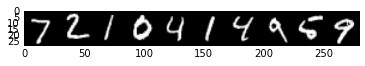

In [5]:
# Run inference.
images = np.zeros((28, 280), np.float)
for i in xrange(10):
    images[:, i*28:(i+1)*28] = np.reshape(test_dataset.images[i], (28, 28))
plt.imshow(images, cmap=plt.get_cmap("gray"))
prob = sess.run(y, feed_dict = {x: test_dataset.images[:10], keep_prob: 1.0})
pred = np.argmax(prob, axis=1)
print "predictions:", pred